## The game

In [6]:
import random

var_1 = 0
var_2 = 0

var_list_1 = []
var_list_2 = []

var_counters_1 = 25
var_counters_2 = 25


round = 5

while round > 0:
    round = round - 1   #take round away
    
    var_choice_1 = random.randint(1,(var_counters_1 - round)) #choose num of counters
    var_choice_2 = random.randint(1,(var_counters_2 - round))
    
    if var_choice_1 > var_choice_2:     #test against each other
        var_1 = var_1 + 1               #add points
    elif var_choice_1 < var_choice_2:
        var_2 = var_2 + 1
    
    var_counters_1 = var_counters_1 - var_choice_1   #remove counters
    var_counters_2 = var_counters_2 - var_choice_2
    
    var_list_1.append(str(var_choice_1))     #add choices to lists
    var_list_2.append(str(var_choice_2))
    
    
print(var_list_1,var_list_2,var_1,var_2)    
        

['9', '8', '1', '1', '3'] ['5', '17', '1', '1', '1'] 2 1


## A function that runs through the game n times

In [7]:
import random
import numpy as np
import pandas


def monte_counters_game(n):
    
    results_array = []
    
    for k in range(n):
        var_1 = 0
        var_2 = 0

        var_list_1 = []
        var_list_2 = []
        
        var_scores_list = []

        var_counters_1 = 25
        var_counters_2 = 25


        round = 5

        while round > 0:
                        
            if round == 1:
                var_choice_1 = var_counters_1  #adjusting for last round
                var_choice_2 = var_counters_2
            else:     
                var_choice_1 = random.randint(1,(var_counters_1 - round - 1)) #choose num of counters
                var_choice_2 = random.randint(1,(var_counters_2 - round - 1))
    
    
            if var_choice_1 > var_choice_2:     #test against each other
                var_1 = var_1 + 1               #add points
            elif var_choice_1 < var_choice_2:
                var_2 = var_2 + 1
    
            var_counters_1 = var_counters_1 - var_choice_1   #remove counters
            var_counters_2 = var_counters_2 - var_choice_2
    
            var_list_1.append(var_choice_1)     #add choices to lists
            var_list_2.append(var_choice_2)
            
            var_scores_list.append(var_choice_1)
            var_scores_list.append(var_choice_2)
            
            to_add = (list(var_list_2),list(var_list_2),var_1,var_2)
            
            round = round - 1   #take round away
            
        results_array.append(to_add)
            
    return results_array,var_scores_list
        
        
monte_counters_game(10)   


([([2, 12, 7, 1, 3], [2, 12, 7, 1, 3], 2, 3),
  ([2, 11, 5, 4, 3], [2, 11, 5, 4, 3], 2, 3),
  ([15, 2, 2, 2, 4], [15, 2, 2, 2, 4], 1, 2),
  ([8, 1, 1, 10, 5], [8, 1, 1, 10, 5], 1, 3),
  ([6, 1, 9, 2, 7], [6, 1, 9, 2, 7], 2, 2),
  ([7, 11, 3, 1, 3], [7, 11, 3, 1, 3], 2, 3),
  ([13, 5, 1, 2, 4], [13, 5, 1, 2, 4], 3, 2),
  ([9, 1, 7, 1, 7], [9, 1, 7, 1, 7], 1, 2),
  ([17, 2, 1, 1, 4], [17, 2, 1, 1, 4], 4, 1),
  ([8, 9, 3, 2, 3], [8, 9, 3, 2, 3], 2, 3)],
 [11, 8, 6, 9, 2, 3, 1, 2, 5, 3])

## A function that runs through the game n times and graphs some results

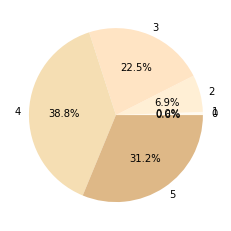

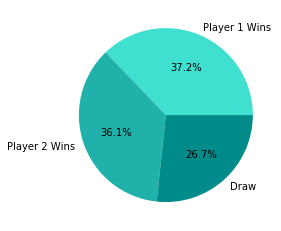

([3717, 3614, 2669],
 ['0.59%',
  '0.0%',
  '6.88%',
  '22.509999999999998%',
  '38.79%',
  '31.230000000000004%'])

In [139]:
import matplotlib.pyplot as plt

import numpy as np

def analyse_results(n):
    
    data_game = monte_counters_game(n)
    
    #wins, draws and points
    
    var_wins_1 = 0
    var_wins_2 = 0
    draw = 0
    
    total_points_scored = {0: 0,1: 0,2: 0,3: 0,4: 0,5: 0}
    
    for k in range(0,n):
        
        
        t_points = data_game[0][k][2] + data_game[0][k][3]
        total_points_scored[t_points] += 1 
        
        if data_game[0][k][2] > data_game[0][k][3]:
            var_wins_1 = var_wins_1 + 1
        elif data_game[0][k][2] < data_game[0][k][3]:
            var_wins_2 = var_wins_2 + 1
        else:
            draw = draw + 1
             
    results_wins = [var_wins_1,var_wins_2,draw]
    
    
    #pie chart for scores
    sizes_scores = []
    
    
    
    for k in range(6):
        sizes_scores.append(total_points_scored[k])
    
    labels_scores = ('0','1','2','3','4','5')
    #sizes_scores = np.arange(len(sizes_scores))
    colors_scores = ['floralwhite','oldlace','papayawhip','bisque','wheat','burlywood']
    
    plt.pie(sizes_scores,labels=labels_scores,colors=colors_scores,autopct='%1.1f%%')
    plt.plot()
    plt.show()
    
    
    
    
    #pie chart for wins
    
    sizes_wins = results_wins
    labels_wins = ('Player 1 Wins','Player 2 Wins','Draw')
    colors_wins = ['turquoise','lightseagreen','darkcyan']
    
    plt.pie(sizes_wins,labels=labels_wins,colors=colors_wins,autopct='%1.1f%%')
    plt.plot()
    plt.show()
    
    
    percentages = []
    for i in sizes_scores:
        percent = 100*(i/n)
        percentages.append(str(percent) + '%')
        
    
    
    return results_wins,percentages 
    
analyse_results(10000)    
    

## Functions that can add 'strategy' to one or more players when simulating a game

In [146]:
#making bots that play against each others

import random

def no_strategy_game(rnd,counters):
        return random.randint(1,(counters - rnd))
    


def strategy_game(rnd,counters,m):
    if rnd == 1:
        return counters
    elif (rnd == 2) and (var_1 == 2) and (var_2 == 1):
        return counters - 1
    elif rnd == 5:
        return random.randint(1,(m - rnd))
    else:
        return random.randint(1,(counters - rnd))
    
'''
Strategy includes not putting more than m counters down in the first round
'''




def playing_the_game(m):
    
    #scores
    var_1 = 0
    var_2 = 0

    var_list_1 = []
    var_list_2 = []

    var_counters_1 = 25
    var_counters_2 = 25
    
    rnd = 5
    
    
    while rnd > 0:
        
    
        var_choice_1 = strategy_game(rnd,var_counters_1,m) #choose num of counters
        var_choice_2 = no_strategy_game(rnd,var_counters_2)
    
        if var_choice_1 > var_choice_2:     #test against each other
            var_1 = var_1 + 1               #add points
        elif var_choice_1 < var_choice_2:
            var_2 = var_2 + 1
    
        var_counters_1 = var_counters_1 - var_choice_1   #remove counters
        var_counters_2 = var_counters_2 - var_choice_2
    
        var_list_1.append(var_choice_1)     #add choices to lists
        var_list_2.append(var_choice_2)
        
        rnd = rnd - 1   #take round away
        
    return var_list_1,var_list_2,var_1,var_2
    
   


playing_the_game(10)



([2, 16, 2, 4, 1], [1, 20, 1, 1, 1], 3, 1)

In [107]:
def monte_counters_game2(n,m):
    
    results_array = []
    
    for k in range(n):        
        results_array.append(playing_the_game(m))
        
        
    var_wins_1 = 0
    var_wins_2 = 0
    draw = 0
        
    for i in range(n):
        if results_array[i][2] > results_array[i][3]:
            var_wins_1 = var_wins_1 + 1
        elif results_array[i][2] < results_array[i][3]:
            var_wins_2 = var_wins_2 + 1
        else:
            draw = draw + 1
        
            
    return results_array,var_wins_1,var_wins_2,draw
        
        
monte_counters_game2(10,10)

([([2, 8, 1, 13, 1], [2, 4, 8, 5, 6], 2, 2),
  ([4, 6, 8, 6, 1], [8, 1, 11, 1, 4], 2, 3),
  ([2, 10, 3, 9, 1], [11, 8, 2, 1, 3], 3, 2),
  ([2, 11, 4, 7, 1], [11, 2, 4, 4, 4], 2, 2),
  ([4, 5, 4, 11, 1], [6, 12, 2, 1, 4], 2, 3),
  ([2, 8, 8, 6, 1], [8, 10, 1, 1, 5], 2, 3),
  ([4, 8, 2, 10, 1], [5, 5, 4, 5, 6], 2, 3),
  ([2, 5, 2, 15, 1], [5, 4, 11, 2, 3], 2, 3),
  ([3, 13, 2, 6, 1], [11, 1, 5, 5, 3], 2, 3),
  ([2, 7, 2, 13, 1], [3, 3, 8, 5, 6], 2, 3)],
 1,
 7,
 2)

## A function that runs through the game n times adding strategy to player 1

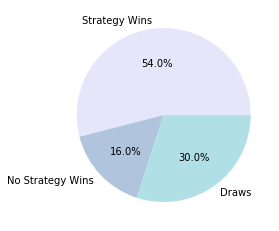

(['% wins with strategy: 54.0%',
  '% wins without strategy: 16.0%',
  '% draws: 30.0%'],
 [54, 16, 30])

In [182]:
#after strategies data

def strategies_data_analysis(n,m):
    
    #pie chart for wins
        
    strategies_data = monte_counters_game2(n,m)
    
    #wins, draws and points
    
    var_wins_1 = strategies_data[1]
    var_wins_2 = strategies_data[2]
    draw = strategies_data[3]
    

    
     

    sizes_wins = [var_wins_1,var_wins_2,draw]
    labels_wins = ('Strategy Wins','No Strategy Wins','Draws')
    colors_wins = ['lavender','lightsteelblue','powderblue']
    
    plt.pie(sizes_wins,labels=labels_wins,colors=colors_wins,autopct='%1.1f%%')
    plt.plot()
    plt.show()
    
    percent_labels = ('% wins with strategy: ','% wins without strategy: ','% draws: ')
    
    percentages = []
    k = 0
    
    for i in sizes_wins:
        percent = (i/n) * 100
        
        label = percent_labels[k]
        k += 1
        percentages.append(label + str(percent) + '%')
        
    return percentages,sizes_wins



    

strategies_data_analysis(100,13)

    

# What effect does the amount of counters placed in the first round have on the percentage of wins?

We can run strategies_data_analysis with different values of m to see the effect it has on the overall win percentages.





## A function that collects and displays data according to a certain type of strategy

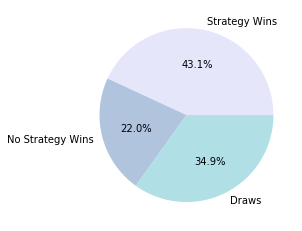

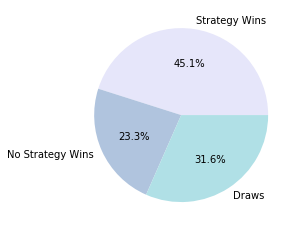

(['% wins with strategy: 45.1%', '% wins without strategy: 23.3%', '% draws: 31.6%'], [451, 233, 316]) First round no more than 1 counter/s


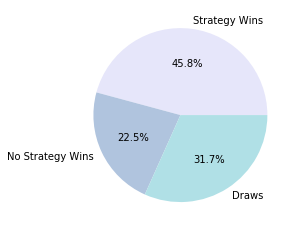

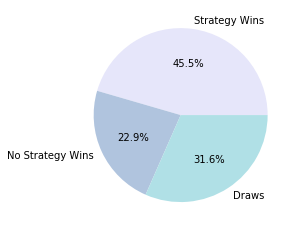

(['% wins with strategy: 45.5%', '% wins without strategy: 22.900000000000002%', '% draws: 31.6%'], [455, 229, 316]) First round no more than 2 counter/s


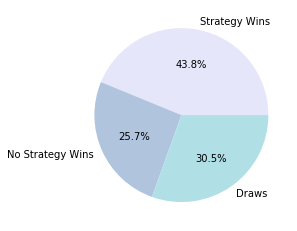

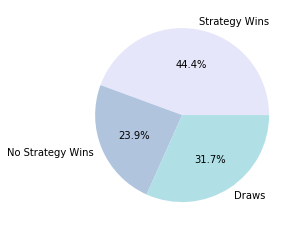

(['% wins with strategy: 44.4%', '% wins without strategy: 23.9%', '% draws: 31.7%'], [444, 239, 317]) First round no more than 3 counter/s


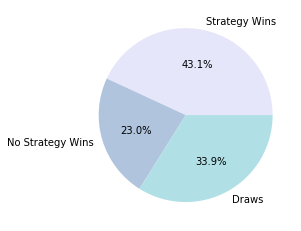

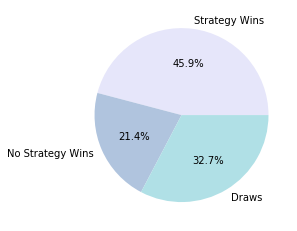

(['% wins with strategy: 45.9%', '% wins without strategy: 21.4%', '% draws: 32.7%'], [459, 214, 327]) First round no more than 4 counter/s


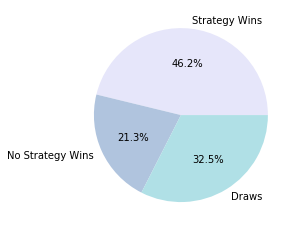

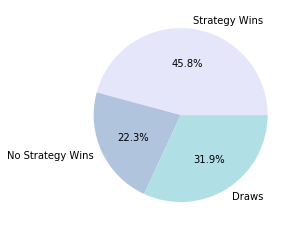

(['% wins with strategy: 45.800000000000004%', '% wins without strategy: 22.3%', '% draws: 31.900000000000002%'], [458, 223, 319]) First round no more than 5 counter/s


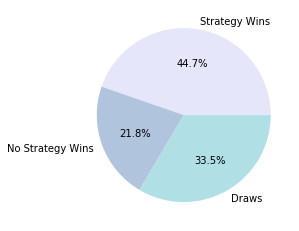

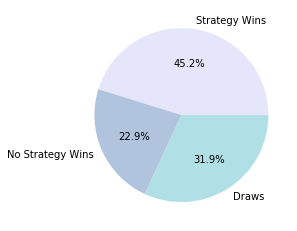

(['% wins with strategy: 45.2%', '% wins without strategy: 22.900000000000002%', '% draws: 31.900000000000002%'], [452, 229, 319]) First round no more than 6 counter/s


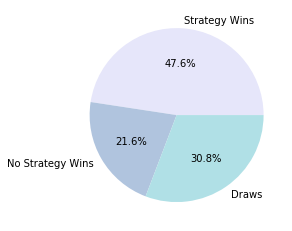

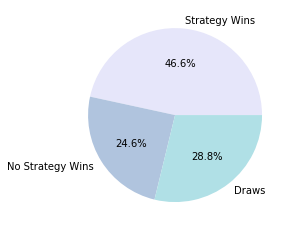

(['% wins with strategy: 46.6%', '% wins without strategy: 24.6%', '% draws: 28.799999999999997%'], [466, 246, 288]) First round no more than 7 counter/s


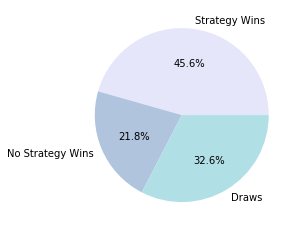

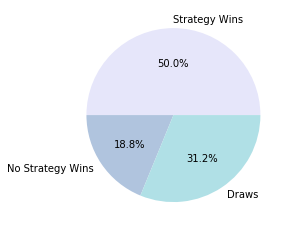

(['% wins with strategy: 50.0%', '% wins without strategy: 18.8%', '% draws: 31.2%'], [500, 188, 312]) First round no more than 8 counter/s


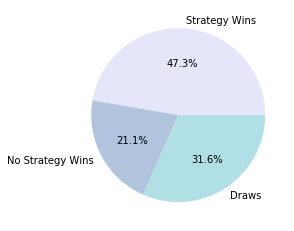

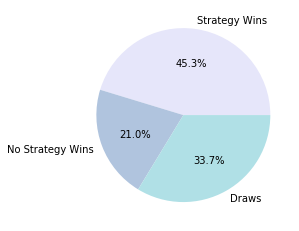

(['% wins with strategy: 45.300000000000004%', '% wins without strategy: 21.0%', '% draws: 33.7%'], [453, 210, 337]) First round no more than 9 counter/s


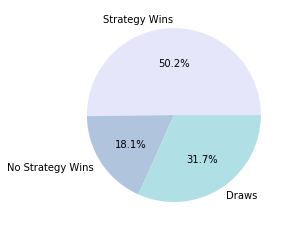

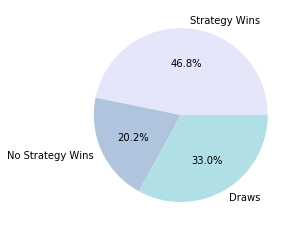

(['% wins with strategy: 46.800000000000004%', '% wins without strategy: 20.200000000000003%', '% draws: 33.0%'], [468, 202, 330]) First round no more than 10 counter/s


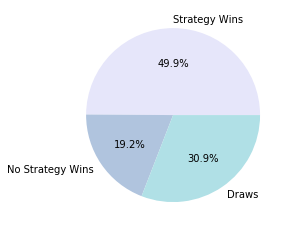

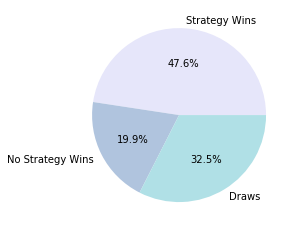

(['% wins with strategy: 47.599999999999994%', '% wins without strategy: 19.900000000000002%', '% draws: 32.5%'], [476, 199, 325]) First round no more than 11 counter/s


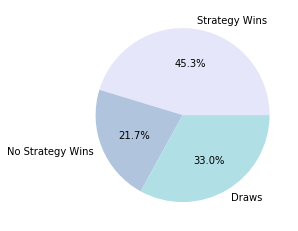

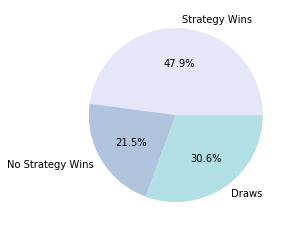

(['% wins with strategy: 47.9%', '% wins without strategy: 21.5%', '% draws: 30.599999999999998%'], [479, 215, 306]) First round no more than 12 counter/s


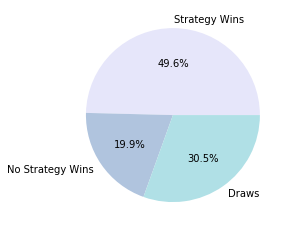

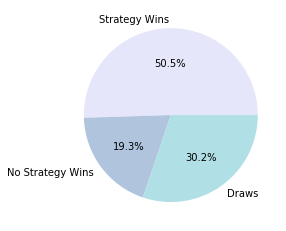

(['% wins with strategy: 50.5%', '% wins without strategy: 19.3%', '% draws: 30.2%'], [505, 193, 302]) First round no more than 13 counter/s


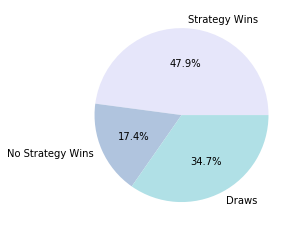

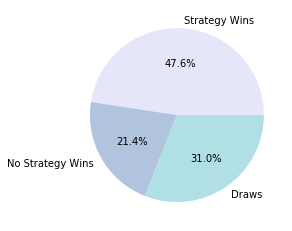

(['% wins with strategy: 47.599999999999994%', '% wins without strategy: 21.4%', '% draws: 31.0%'], [476, 214, 310]) First round no more than 14 counter/s


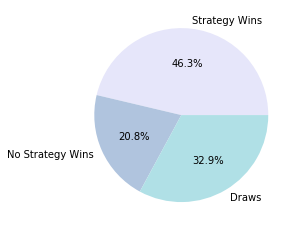

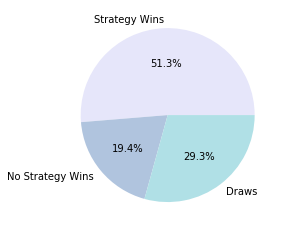

(['% wins with strategy: 51.300000000000004%', '% wins without strategy: 19.400000000000002%', '% draws: 29.299999999999997%'], [513, 194, 293]) First round no more than 15 counter/s


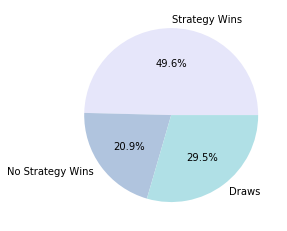

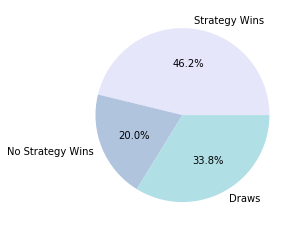

(['% wins with strategy: 46.2%', '% wins without strategy: 20.0%', '% draws: 33.800000000000004%'], [462, 200, 338]) First round no more than 16 counter/s


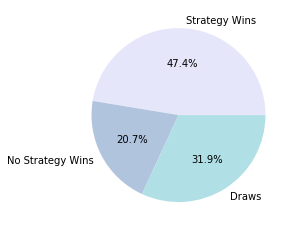

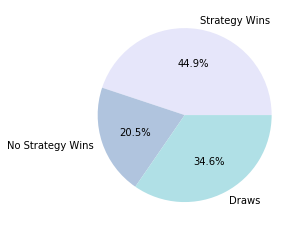

(['% wins with strategy: 44.9%', '% wins without strategy: 20.5%', '% draws: 34.599999999999994%'], [449, 205, 346]) First round no more than 17 counter/s


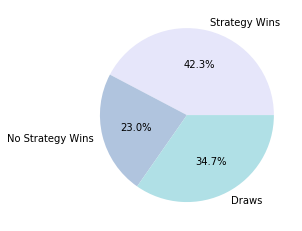

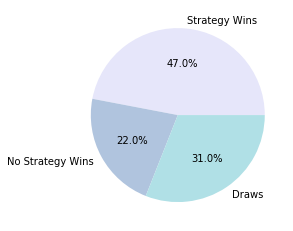

(['% wins with strategy: 47.0%', '% wins without strategy: 22.0%', '% draws: 31.0%'], [470, 220, 310]) First round no more than 18 counter/s


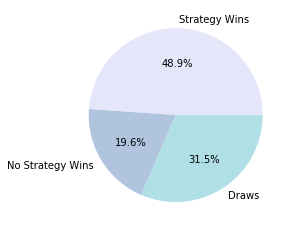

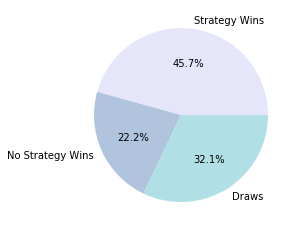

(['% wins with strategy: 45.7%', '% wins without strategy: 22.2%', '% draws: 32.1%'], [457, 222, 321]) First round no more than 19 counter/s


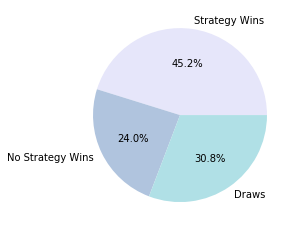

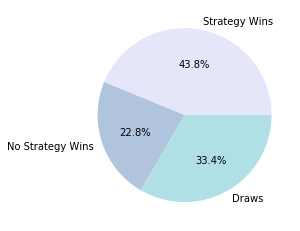

(['% wins with strategy: 43.8%', '% wins without strategy: 22.8%', '% draws: 33.4%'], [438, 228, 334]) First round no more than 20 counter/s


[[431, 220, 349],
 [458, 225, 317],
 [438, 257, 305],
 [431, 230, 339],
 [462, 213, 325],
 [447, 218, 335],
 [476, 216, 308],
 [456, 218, 326],
 [473, 211, 316],
 [502, 181, 317],
 [499, 192, 309],
 [453, 217, 330],
 [496, 199, 305],
 [479, 174, 347],
 [463, 208, 329],
 [496, 209, 295],
 [474, 207, 319],
 [423, 230, 347],
 [489, 196, 315],
 [452, 240, 308]]

In [157]:
def first_counters_down():
    
    wins_strat = []

    for i in range(6,26):
        
        my_list = strategies_data_analysis(10000,i)
        wins_strat.append(my_list[1])
        
        print(strategies_data_analysis(10000,i),"First round no more than " + str(i-5) + " counter/s")
        
        
    return wins_strat



## A function that creates a bar graph in order to visualise the effect of a certain type of strategy

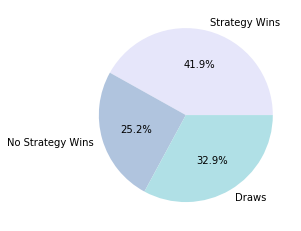

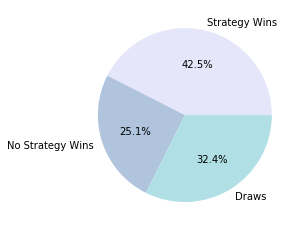

(['% wins with strategy: 42.5%', '% wins without strategy: 25.1%', '% draws: 32.4%'], [425, 251, 324]) First round no more than 1 counter/s


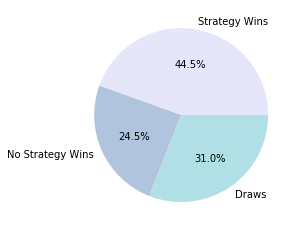

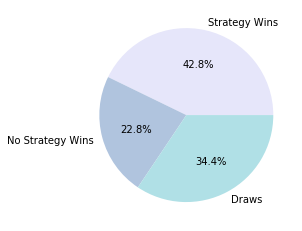

(['% wins with strategy: 42.8%', '% wins without strategy: 22.8%', '% draws: 34.4%'], [428, 228, 344]) First round no more than 2 counter/s


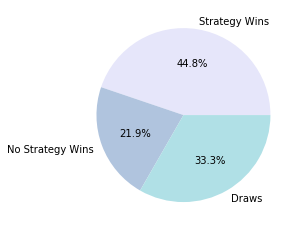

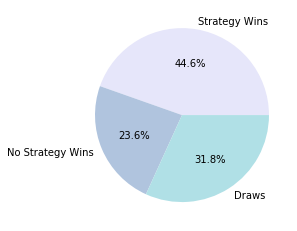

(['% wins with strategy: 44.6%', '% wins without strategy: 23.599999999999998%', '% draws: 31.8%'], [446, 236, 318]) First round no more than 3 counter/s


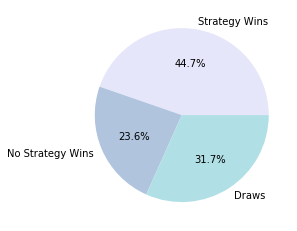

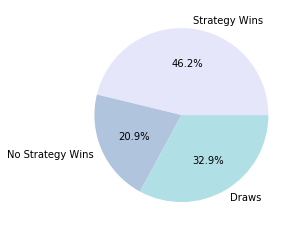

(['% wins with strategy: 46.2%', '% wins without strategy: 20.9%', '% draws: 32.9%'], [462, 209, 329]) First round no more than 4 counter/s


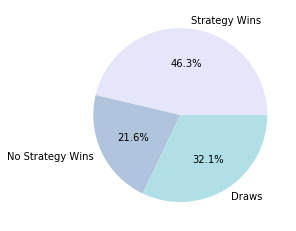

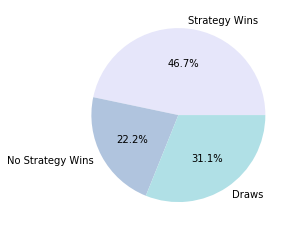

(['% wins with strategy: 46.7%', '% wins without strategy: 22.2%', '% draws: 31.1%'], [467, 222, 311]) First round no more than 5 counter/s


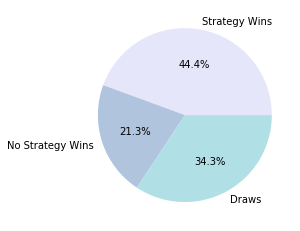

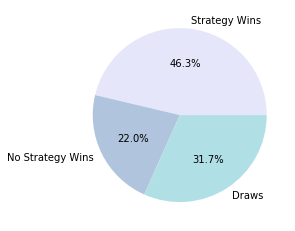

(['% wins with strategy: 46.300000000000004%', '% wins without strategy: 22.0%', '% draws: 31.7%'], [463, 220, 317]) First round no more than 6 counter/s


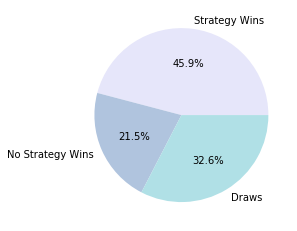

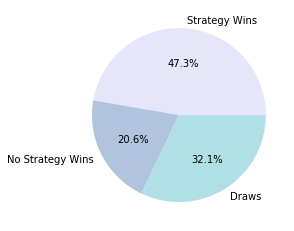

(['% wins with strategy: 47.3%', '% wins without strategy: 20.599999999999998%', '% draws: 32.1%'], [473, 206, 321]) First round no more than 7 counter/s


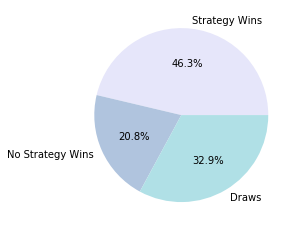

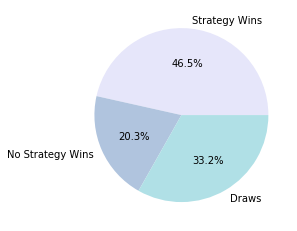

(['% wins with strategy: 46.5%', '% wins without strategy: 20.3%', '% draws: 33.2%'], [465, 203, 332]) First round no more than 8 counter/s


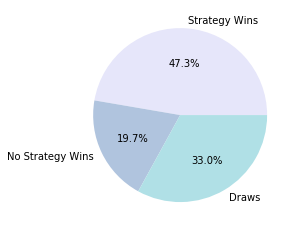

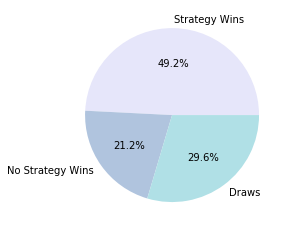

(['% wins with strategy: 49.2%', '% wins without strategy: 21.2%', '% draws: 29.599999999999998%'], [492, 212, 296]) First round no more than 9 counter/s


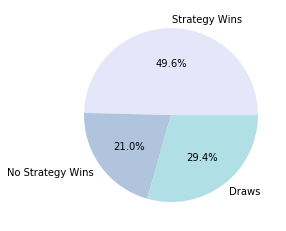

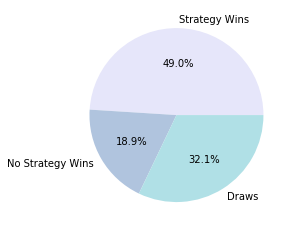

(['% wins with strategy: 49.0%', '% wins without strategy: 18.9%', '% draws: 32.1%'], [490, 189, 321]) First round no more than 10 counter/s


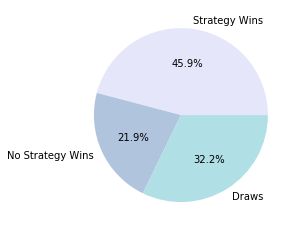

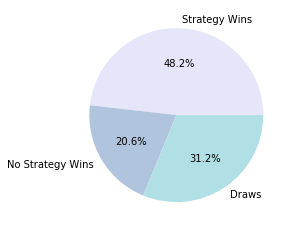

(['% wins with strategy: 48.199999999999996%', '% wins without strategy: 20.599999999999998%', '% draws: 31.2%'], [482, 206, 312]) First round no more than 11 counter/s


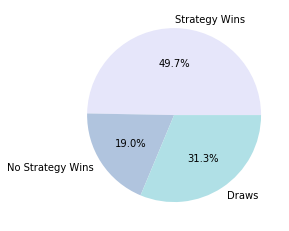

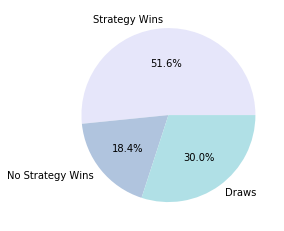

(['% wins with strategy: 51.6%', '% wins without strategy: 18.4%', '% draws: 30.0%'], [516, 184, 300]) First round no more than 12 counter/s


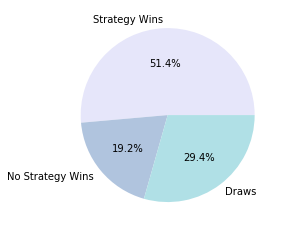

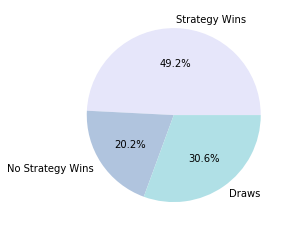

(['% wins with strategy: 49.2%', '% wins without strategy: 20.200000000000003%', '% draws: 30.599999999999998%'], [492, 202, 306]) First round no more than 13 counter/s


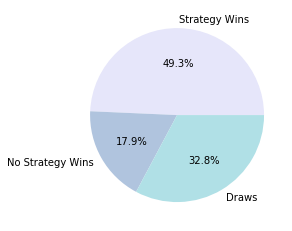

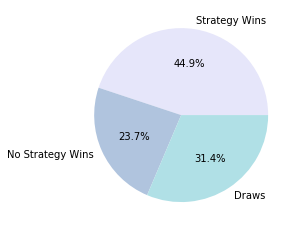

(['% wins with strategy: 44.9%', '% wins without strategy: 23.7%', '% draws: 31.4%'], [449, 237, 314]) First round no more than 14 counter/s


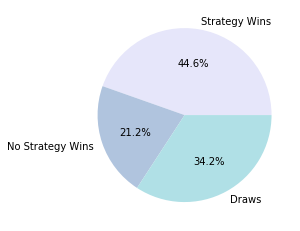

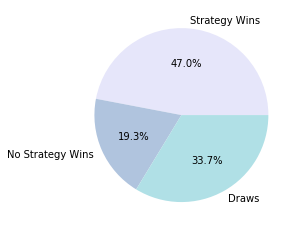

(['% wins with strategy: 47.0%', '% wins without strategy: 19.3%', '% draws: 33.7%'], [470, 193, 337]) First round no more than 15 counter/s


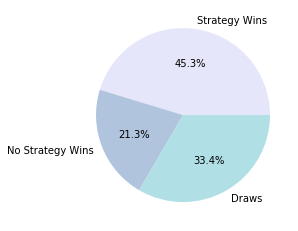

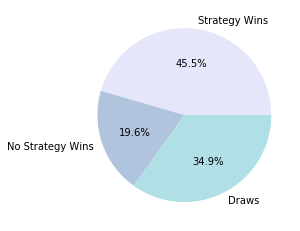

(['% wins with strategy: 45.5%', '% wins without strategy: 19.6%', '% draws: 34.9%'], [455, 196, 349]) First round no more than 16 counter/s


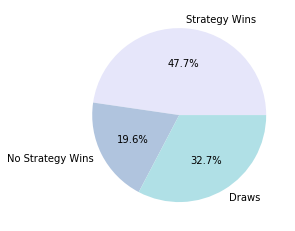

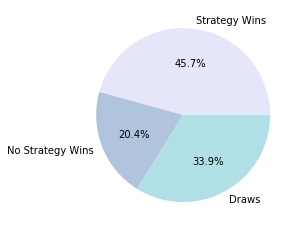

(['% wins with strategy: 45.7%', '% wins without strategy: 20.4%', '% draws: 33.900000000000006%'], [457, 204, 339]) First round no more than 17 counter/s


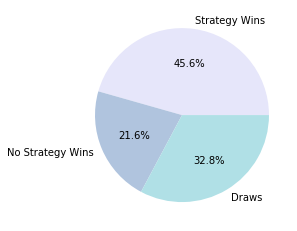

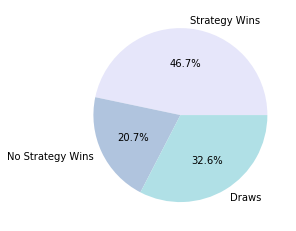

(['% wins with strategy: 46.7%', '% wins without strategy: 20.7%', '% draws: 32.6%'], [467, 207, 326]) First round no more than 18 counter/s


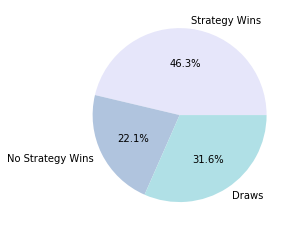

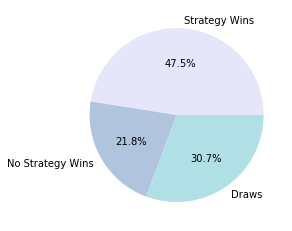

(['% wins with strategy: 47.5%', '% wins without strategy: 21.8%', '% draws: 30.7%'], [475, 218, 307]) First round no more than 19 counter/s


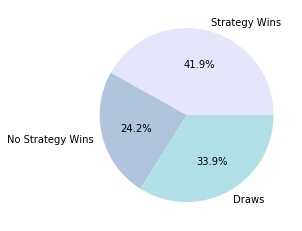

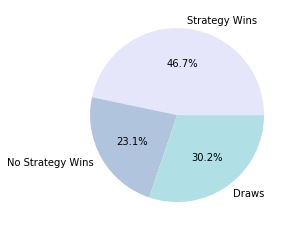

(['% wins with strategy: 46.7%', '% wins without strategy: 23.1%', '% draws: 30.2%'], [467, 231, 302]) First round no more than 20 counter/s


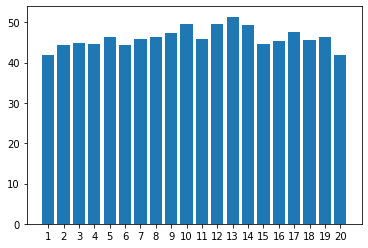

In [186]:
#bar graph

import matplotlib.pyplot as plt
import numpy as np

wins_data = first_counters_down()

x_values = []



for k in range(len(wins_data)):
    
    percent = (wins_data[k][0]/1000) * 100
    x_values.append(percent)
    

x = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"]
y = x_values

plt.bar(x, x_values)
plt.show()


